<a href="https://colab.research.google.com/github/hananbahtiti/Hybrid-Intrusion-detection-Systems/blob/main/network_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrwellsdavid_unsw_nb15_path = kagglehub.dataset_download('mrwellsdavid/unsw-nb15')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
#Create folder
folder_name = '/kaggle/working/dataset'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

# Load the CSV files
df1 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')
df2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

# Concatenate them vertically (stack rows)
df_combined = pd.concat([df1, df2], ignore_index=True)

# Save to a new CSV (optional)
df_combined.to_csv(f'{folder_name}/UNSW_NB15.csv', index=False)


The folder has been created: /kaggle/working/dataset


In [ ]:
df = pd.read_csv('/kaggle/working/dataset/UNSW_NB15.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
df['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
(df.isna().mean()) * 100

id                   0.0
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0


In [ ]:
df[df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
df = df.replace({'service': '-'}, 'unknown')


In [ ]:
df['service'].value_counts()

service
unknown     141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

In [ ]:
df['proto'].value_counts()

proto
tcp      123041
udp       92701
unas      15599
arp        3846
ospf       3271
          ...  
argus       131
hmp         131
igmp         48
icmp         15
rtp           1
Name: count, Length: 133, dtype: int64

In [ ]:
df['state'].value_counts()

state
FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
PAR         1
URN         1
no          1
CLO         1
Name: count, dtype: int64

In [ ]:
#count of unique values in the column attack_cat

df['attack_cat'].value_counts()


attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [ ]:
##count of unique values in the column label

df['label'].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

In [ ]:
def data_encoding(file_path, columns: list):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        for column in columns:
            if column in df.columns:
                print(f"\n🔄 Encoding column: '{column}'")

                # Extract unique non-null values with progress bar
                unique_values = df[column].dropna().unique()
                tqdm(unique_values, desc=f"Extracting values from '{column}'")
                print(f"✅ Number of unique values in '{column}': {len(unique_values)}")

                # Fit and transform using LabelEncoder
                encoder = LabelEncoder()
                encoder.fit(unique_values)

                # Replace NaN with empty string temporarily for encoding
                df[column] = df[column].fillna('').astype(str)
                df[column] = encoder.transform(df[column])
            else:
                print(f"❌ Column '{column}' not found in the file.")

        # Save updated DataFrame
        df.to_csv(file_path, index=False)
        print(f"\n✅ Encoding completed for all specified columns in file: {file_path}")
        return "✅ Encoding completed."

    except Exception as e:
        return f"❌ An error occurred: {e}"

In [ ]:
columns_to_encode = ['attack_cat', 'state', 'service', 'proto']
data_encoding(file_path='/kaggle/working/dataset/UNSW_NB15.csv'
              , columns=columns_to_encode)


🔄 Encoding column: 'attack_cat'


Extracting values from 'attack_cat':   0%|          | 0/10 [00:00<?, ?it/s]


✅ Number of unique values in 'attack_cat': 10

🔄 Encoding column: 'state'


Extracting values from 'state':   0%|          | 0/11 [00:00<?, ?it/s]


✅ Number of unique values in 'state': 11

🔄 Encoding column: 'service'


Extracting values from 'service':   0%|          | 0/13 [00:00<?, ?it/s]

✅ Number of unique values in 'service': 13



🔄 Encoding column: 'proto'


Extracting values from 'proto':   0%|          | 0/133 [00:00<?, ?it/s]


✅ Number of unique values in 'proto': 133

✅ Encoding completed for all specified columns in file: /kaggle/working/dataset/UNSW_NB15.csv


'✅ Encoding completed.'

In [ ]:
df = pd.read_csv('/kaggle/working/dataset/UNSW_NB15.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,4,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,4,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,4,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,4,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,4,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  int64  
 3   service            257673 non-null  int64  
 4   state              257673 non-null  int64  
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

##  **Data Visualization**

In [ ]:
folder_name = '/kaggle/working/plots'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

The folder has been created: /kaggle/working/plots


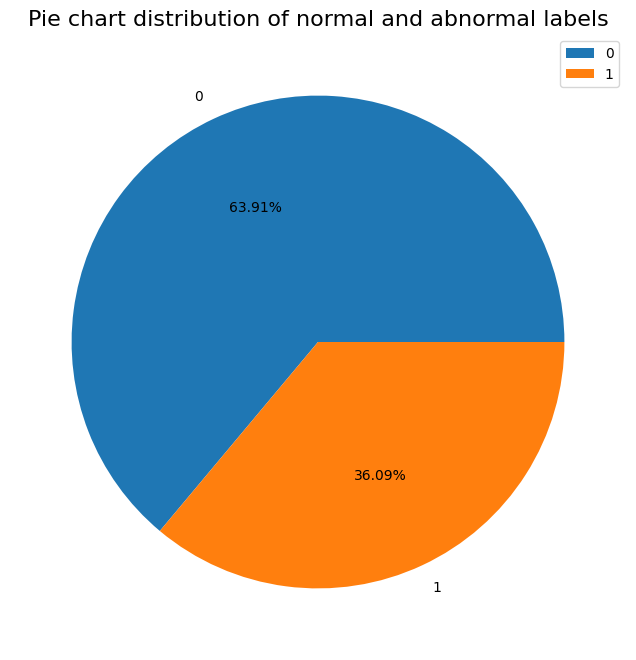

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts(),labels=[0, 1],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('/kaggle/working/plots/Pie_chart_binary.png')
plt.show()

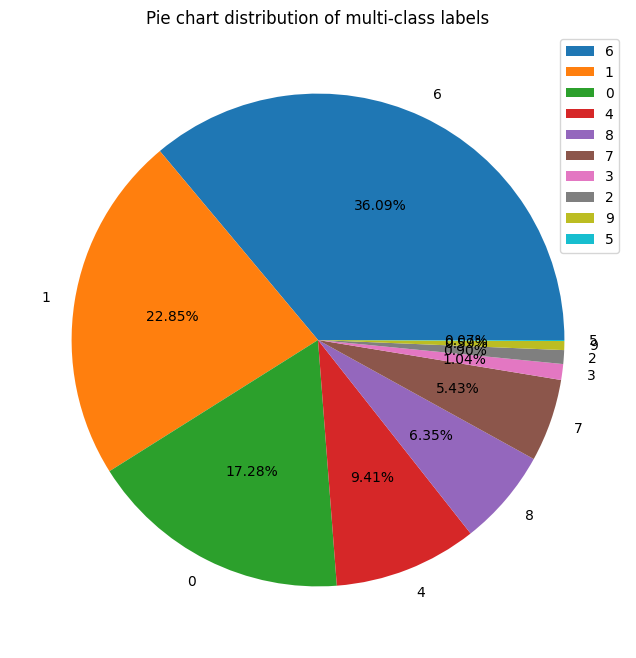

In [ ]:

plt.figure(figsize=(8,8))
plt.pie(df.attack_cat.value_counts(),labels=df.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('/kaggle/working/plots/Pie_chart_multi.png')
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)

# Correlation Matrix for Binary Labels
plt.figure(figsize=(20, 1))
sns.heatmap(df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Label', fontsize=16)
plt.tight_layout()
plt.savefig('/kaggle/working/plots/correlation_matrix_bin.png')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7afd3d4b1080> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7afd3d56aca0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# حساب مصفوفة الارتباط لجميع الأعمدة الرقمية
corr_matrix = df.corr(numeric_only=True)

# استخراج الارتباط بين جميع الأعمدة وعمود label
corr_with_label = corr_matrix['label'].abs()  # القيم المطلقة فقط

# استخراج الخصائص ذات ارتباط أعلى من 0.3
highest_corr_bin = corr_with_label[corr_with_label > 0.3]

# ترتيب النتائج من الأقل إلى الأعلى
highest_corr_bin = highest_corr_bin.sort_values(ascending=True)

# عرض النتائج
print("🔍 Top correlated features with 'label':")
print(highest_corr_bin)


🔍 Top correlated features with 'label':
ct_src_dport_ltm    0.318518
rate                0.335883
dwin                0.339166
dload               0.352169
swin                0.364877
ct_dst_sport_ltm    0.371672
state               0.462972
ct_state_ttl        0.476559
id                  0.490584
attack_cat          0.602160
sttl                0.624082
label               1.000000
Name: label, dtype: float64


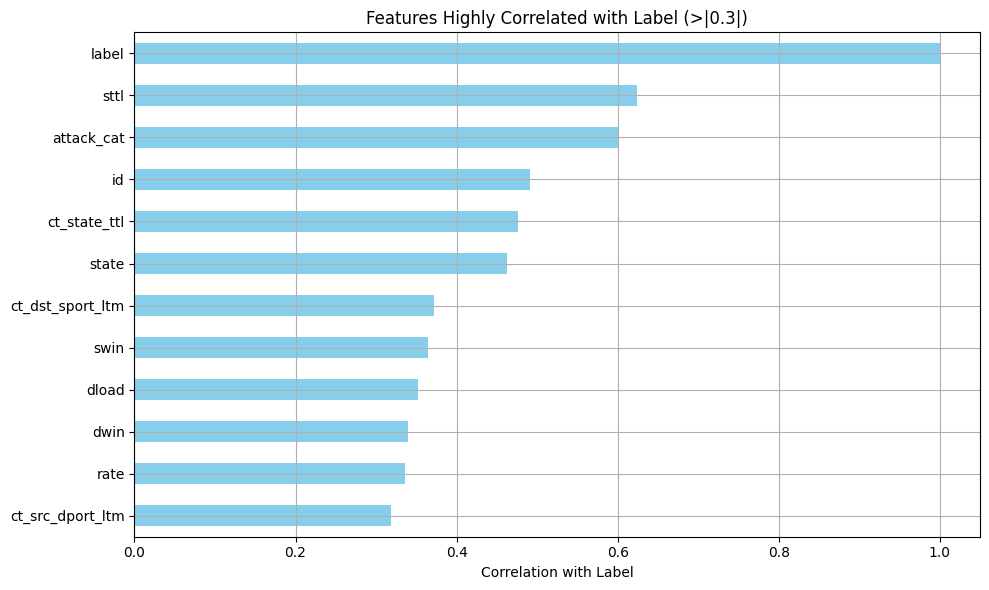

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
highest_corr_bin.plot(kind='barh', color='skyblue')
plt.title("Features Highly Correlated with Label (>|0.3|)")
plt.xlabel("Correlation with Label")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['ct_src_dport_ltm', 'rate', 'dwin', 'dload', 'swin', 'ct_dst_sport_ltm',
       'state', 'ct_state_ttl', 'id', 'attack_cat', 'sttl', 'label'],
      dtype='object')

In [ ]:
# Binary labelled Dataset
bin_data = df[bin_cols].copy()
bin_data

,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0
...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1,200000.005100,0,0.000000,0,1,5,2,82328,6,254,0
257669,1,24.410067,255,2242.109863,255,1,4,1,82329,6,254,0
257670,1,0.000000,0,0.000000,0,1,5,2,82330,6,0,0
257671,1,0.000000,0,0.000000,0,1,5,2,82331,6,0,0


In [ ]:
bin_data.to_csv('/kaggle/working/dataset/bin_data.csv')
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ct_src_dport_ltm  257673 non-null  int64  
 1   rate              257673 non-null  float64
 2   dwin              257673 non-null  int64  
 3   dload             257673 non-null  float64
 4   swin              257673 non-null  int64  
 5   ct_dst_sport_ltm  257673 non-null  int64  
 6   state             257673 non-null  int64  
 7   ct_state_ttl      257673 non-null  int64  
 8   id                257673 non-null  int64  
 9   attack_cat        257673 non-null  int64  
 10  sttl              257673 non-null  int64  
 11  label             257673 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 23.6 MB


In [ ]:
bin_data.head()

,ct_src_dport_ltm,rate,dwin,dload,swin,ct_dst_sport_ltm,state,ct_state_ttl,id,attack_cat,sttl,label
0,1,74.087490,255,8495.365234,255,1,4,0,1,6,252,0
1,1,78.473372,255,503571.312500,255,1,4,1,2,6,62,0
2,1,14.170161,255,60929.230470,255,1,4,1,3,6,62,0
3,1,13.677108,255,3358.622070,255,1,4,1,4,6,62,0
4,2,33.373826,255,3987.059814,255,1,4,1,5,6,254,0


In [ ]:
folder_name = '/kaggle/working/model'
os.makedirs(folder_name, exist_ok=True)
print(f"The folder has been created: {folder_name}")

The folder has been created: /kaggle/working/model


Epoch 1/100
4609/4650 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1586
Epoch 1: val_loss improved from inf to 0.00214, saving model to /kaggle/working/model/autoencoder_model.keras
4650/4650 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1576 - val_loss: 0.0021
Epoch 2/100
4646/4650 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015
Epoch 2: val_loss improved from 0.00214 to 0.00031, saving model to /kaggle/working/model/autoencoder_model.keras
4650/4650 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0015 - val_loss: 3.1428e-04
Epoch 3/100
4631/4650 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5812e-04
Epoch 3: val_loss improved from 0.00031 to 0.00012, saving model to /kaggle/working/model/autoencoder_model.keras
4650/4650 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.5798e-04 - val_loss: 1.2220e-04
Epoch 4/100
4622/4650 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4150e-04
Epoch 4: val_loss did not improve from 0.00012
4650/4650 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.4144e-04 - val_loss: 1.9767e-04

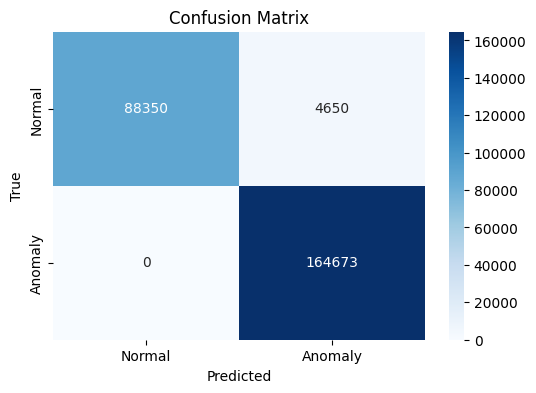

[✓] Loss plot saved to: /kaggle/working/model/training_loss.png


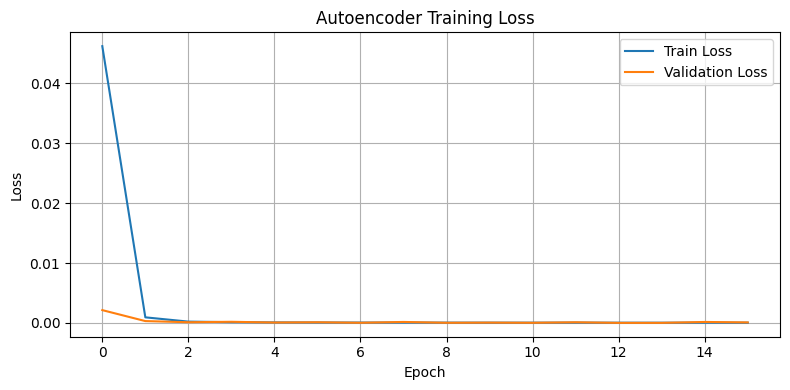

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[✓] Error distribution plot saved to: /kaggle/working/model/reconstruction_error_distribution.png


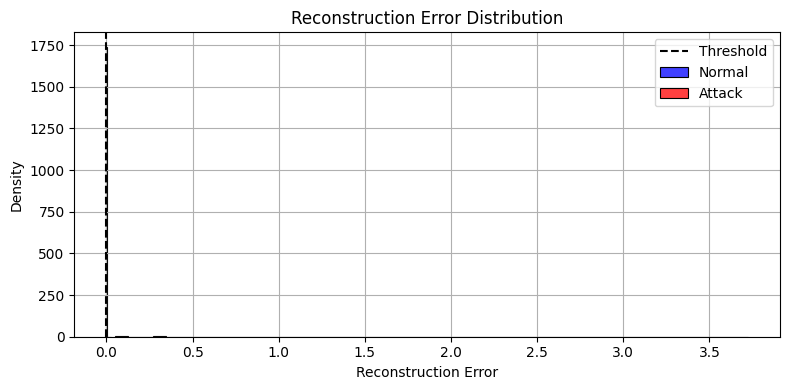

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ========== SETTINGS ==========
DATA_PATH = '/kaggle/working/dataset/bin_data.csv'  # Input CSV
OUTPUT_CSV = '/kaggle/working/model/anomaly_detection_results.csv'
MODEL_PATH = '/kaggle/working/model/autoencoder_model.keras'
PLOT_DIR = '/kaggle/working/model/'
os.makedirs(PLOT_DIR, exist_ok=True)

# ========== LOAD & PREPARE DATA ==========
data = pd.read_csv(DATA_PATH)
X = data.drop(columns=['label'])
y = data['label']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use only normal samples to train the autoencoder
X_normal = X_scaled[y == 0]
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

# ========== AUTOENCODER MODEL ==========
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)
"""
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)"""

decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(MODEL_PATH, save_best_only=True, monitor='val_loss', verbose=1)

# ========== TRAINING ==========
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, X_val),
    shuffle=True,
    verbose=1,
    callbacks=[early_stop, model_checkpoint]
)

print(f"[✓] Model saved to: {MODEL_PATH}")

# ========== PREDICTION ==========
X_pred = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_pred - X_scaled, 2), axis=1)
#threshold = mse[y == 0].max()
threshold = np.percentile(mse[y == 0], 95)

# Predict anomalies
predictions = (mse > threshold).astype(int)


# Save predictions
output_df = data.copy()
output_df['reconstruction_error'] = mse
output_df['predicted'] = predictions
output_df.to_csv(OUTPUT_CSV, index=False)
print(f"[✓] Predictions saved to: {OUTPUT_CSV}")

# ========== METRICS ==========
y_true = y.values
auc = roc_auc_score(y_true, mse)
f1 = f1_score(y_true, predictions)


print(f"AUC Score: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_true, predictions))

# ========== CONFUSION MATRIX HEATMAP ==========
conf_mat = confusion_matrix(y_true, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
conf_path = os.path.join(PLOT_DIR, 'confusion_matrix.png')
plt.savefig(conf_path)
print(f"[✓] Confusion matrix plot saved to: {conf_path}")
plt.show()
plt.close()

# ========== PLOT TRAINING LOSS ==========
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
loss_path = os.path.join(PLOT_DIR, 'training_loss.png')
plt.savefig(loss_path)
print(f"[✓] Loss plot saved to: {loss_path}")
plt.show()
plt.close()

# ========== PLOT RECONSTRUCTION ERROR DISTRIBUTION ==========
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_label': y_true})
plt.figure(figsize=(8, 4))
sns.histplot(error_df[error_df['true_label'] == 0]['reconstruction_error'], bins=50, color='blue', label='Normal', stat='density')
sns.histplot(error_df[error_df['true_label'] == 1]['reconstruction_error'], bins=50, color='red', label='Attack', stat='density')
plt.axvline(threshold, color='black', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
error_path = os.path.join(PLOT_DIR, 'reconstruction_error_distribution.png')
plt.savefig(error_path)
print(f"[✓] Error distribution plot saved to: {error_path}")
plt.show()
plt.close()


[✓] ROC curve plot saved to: /kaggle/working/model/roc_curve.png


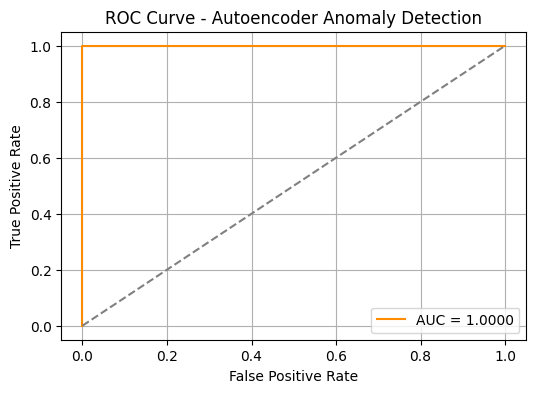

In [ ]:
from sklearn.metrics import roc_curve

# حساب القيم لرسم منحنى ROC
fpr, tpr, thresholds = roc_curve(y_true, mse)

# رسم المنحنى
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder Anomaly Detection')
plt.legend(loc='lower right')
plt.grid(True)

roc_path = os.path.join(PLOT_DIR, 'roc_curve.png')
plt.savefig(roc_path)
print(f"[✓] ROC curve plot saved to: {roc_path}")
plt.show()
plt.close()


In [ ]:
!zip -r /kaggle/working/model.zip /kaggle/working/model


  adding: kaggle/working/model/ (stored 0%)
  adding: kaggle/working/model/autoencoder_model.keras (deflated 70%)
  adding: kaggle/working/model/confusion_matrix.png (deflated 12%)
  adding: kaggle/working/model/reconstruction_error_distribution.png (deflated 16%)
  adding: kaggle/working/model/anomaly_detection_results.csv (deflated 70%)
  adding: kaggle/working/model/roc_curve.png (deflated 12%)
  adding: kaggle/working/model/training_loss.png (deflated 13%)


In [ ]:
from IPython.display import FileLink

FileLink('/kaggle/working/model.zip')


/kaggle/working/model.zip